<a href="https://colab.research.google.com/github/seongheek/econtheory/blob/main/7%EC%A3%BC%EC%B0%A8_%EA%B0%95%EC%9D%98_%ED%9A%8C%EA%B7%80%EC%84%A0_%EA%B7%B8%EB%A6%AC%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **자료 분석을 위한 준비: 데이터 가공하기**
지난 시간에 사용했던 자료를 또 사용해보자.

In [1]:
import pandas as pd
import numpy as np

df=pd.read_excel('econliteracy.xlsx', index_col=0)

df = df.rename(columns={'sq1': 'gender', 'sq2': 'age', 'sq3': 'region', 'sq4': 'job', 'sq5': 'edu', 'sq6': 'income'})  #열 이름 바꾸기

df=df.dropna(subset=['gender'])        #성별 정보가 누락된 샘플 제거


회귀선을 그려보자. lmplot 명령어를 사용한다.

In [2]:
gendercategories = {1: "Male", 2: "Female"}
df['gender2']=df['gender'].map(gendercategories)   #성별 라벨이 붙은 변수 생성

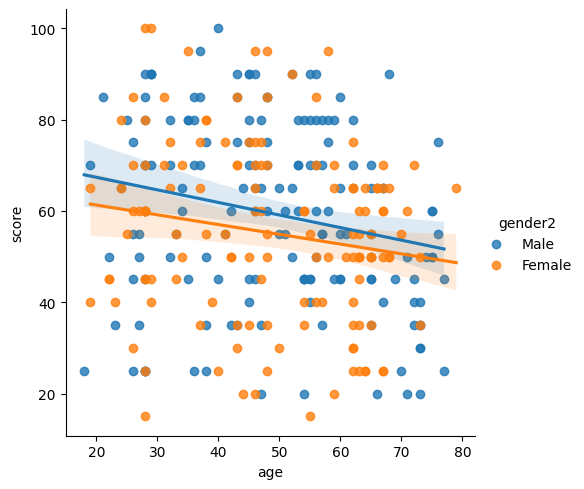

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.lmplot(x='age', y='score', hue='gender2', data=df)

plt.show()

기타 옵션 조정을 통해 그래프를 더 정교하게 그려보자.

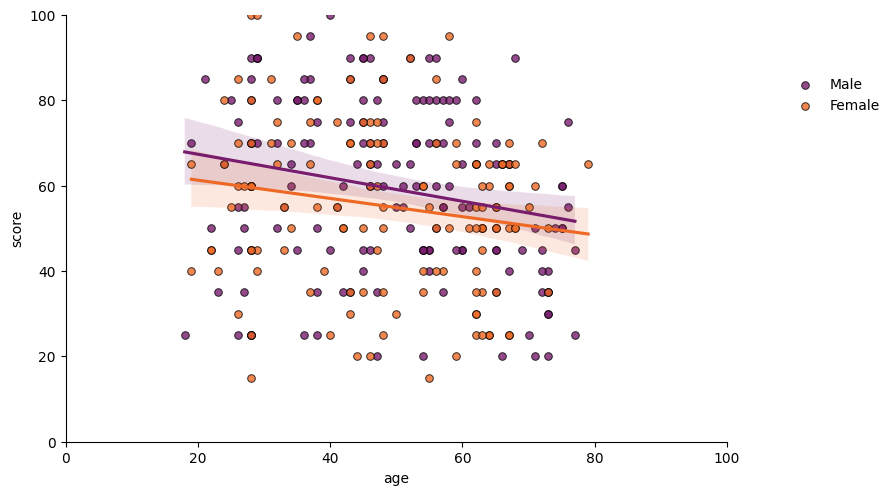

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

fig=sns.lmplot(
    x='age', y='score', hue='gender2', data=df,
    palette='inferno', height=5, aspect=1.5,
    scatter_kws=dict(s=30, linewidths=0.7, edgecolors='black')
)

fig.set(xlim=(0, 100), ylim=(0, 100))

# 범례 제목 제거
fig._legend.set_title(None)

fig._legend.set_bbox_to_anchor((1.05, 0.8))  # 오른쪽 바깥에 위치
plt.show()


참고로, 회귀결과는 statsmodels 패키지를 사용한다.

In [5]:
import statsmodels.api as sm

X = sm.add_constant(df['age'])   # 상수항 (intercept) 추가
y = df['score']

model = sm.OLS(y, X).fit()           # OLS 회귀 실행
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     11.04
Date:                Wed, 16 Apr 2025   Prob (F-statistic):            0.00100
Time:                        06:29:00   Log-Likelihood:                -1302.2
No. Observations:                 297   AIC:                             2608.
Df Residuals:                     295   BIC:                             2616.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         69.3001      3.744     18.510      0.0

성별로 따로 회귀결과를 보고 싶다면, 데이터프레임을 성별로 나누어 진행한다.

In [6]:
male_df = df[df['gender'] == 1]

X = sm.add_constant(male_df['age'])

y = male_df['score']

model = sm.OLS(y, X).fit()

print("남성 회귀식 결과")
model.summary()


남성 회귀식 결과


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     7.637
Date:                Wed, 16 Apr 2025   Prob (F-statistic):            0.00640
Time:                        06:29:14   Log-Likelihood:                -702.48
No. Observations:                 160   AIC:                             1409.
Df Residuals:                     158   BIC:                             1415.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         72.8779      5.149     14.155      0.000      62.709      83.047
age           -0.2754      0.100     -2.764      0.006      -0.472      -0.079
==============================================================================
Omnibus:                        9.135   Durbin-Watson:                   1.806
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                5.257
Skew:                          -0.261   Prob(JB):                       0.0722
Kurtosis:                       2.282   Cond. No.                         171.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
female_df = df[df['gender'] == 2]

X = sm.add_constant(female_df['age'])

y = female_df['score']

model = sm.OLS(y, X).fit()

print("여성 회귀식 결과")
model.summary()


여성 회귀식 결과


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     3.982
Date:                Wed, 16 Apr 2025   Prob (F-statistic):             0.0480
Time:                        06:29:19   Log-Likelihood:                -597.78
No. Observations:                 137   AIC:                             1200.
Df Residuals:                     135   BIC:                             1205.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         65.5700      5.421     12.095      0.000      54.849      76.291
age           -0.2138      0.107     -1.996      0.048      -0.426      -0.002
==============================================================================
Omnibus:                        1.893   Durbin-Watson:                   2.154
Prob(Omnibus):                  0.388   Jarque-Bera (JB):                1.456
Skew:                          -0.007   Prob(JB):                        0.483
Kurtosis:                       2.495   Cond. No.                         168.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

잔차 플롯(residual plot)를 그려보자.

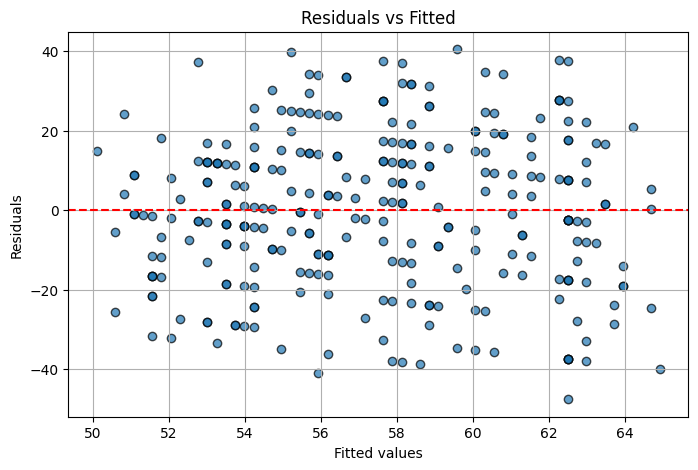

In [8]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

X = sm.add_constant(df['age'])   # 상수항 (intercept) 추가
y = df['score']

model = sm.OLS(y, X).fit()           # OLS 회귀 실행

# 예측값과 잔차
fitted = model.fittedvalues         # 예측값
residuals = model.resid             # 잔차

plt.figure(figsize=(8,5))
plt.scatter(fitted, residuals, edgecolor='black', alpha=0.7)     # alpha로 투명도 조절 --> 겹치면 진하게 나옴
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.grid(True)
plt.show()

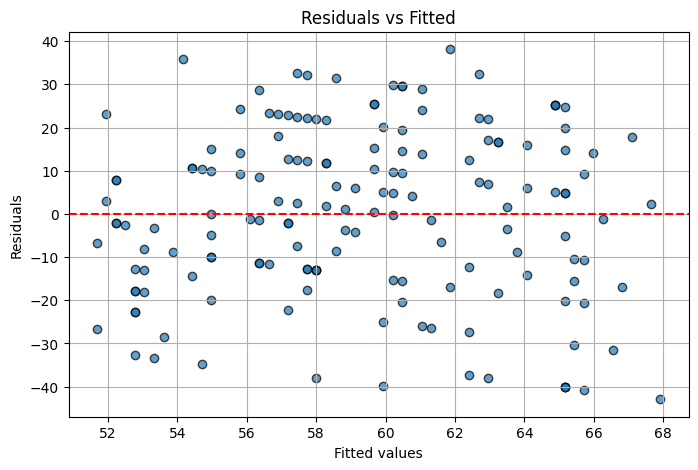

In [9]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

X = sm.add_constant(male_df['age'])   # 상수항 (intercept) 추가
y = male_df['score']

model = sm.OLS(y, X).fit()           # OLS 회귀 실행

# 예측값과 잔차
fitted = model.fittedvalues         # 예측값
residuals = model.resid             # 잔차

plt.figure(figsize=(8,5))
plt.scatter(fitted, residuals, edgecolor='black', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.grid(True)
plt.show()

Seaborn으로도 잔차플롯을 그릴 수 있다.

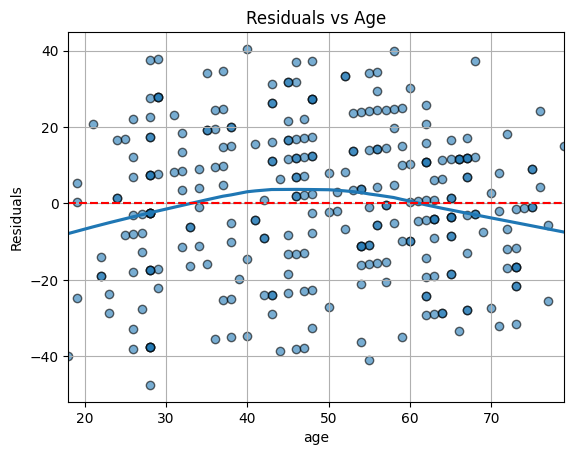

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.residplot(x='age', y='score', data=df, lowess=True,      #lowess: 잔차를 이어주는 선, 패턴파악
                  scatter_kws=dict(alpha=0.6, edgecolor='black'))
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Age")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

이제 소득과 경제이해력의 관계를 살펴보자. 우선 응답자들의 소득분포를 살펴본 후, 너무 소수인 그룹은 다른 유사그룹과 합쳐준다.

In [11]:
df['income'].value_counts().sort_index()          #sort index는 정렬할 때 쓴다.

,count
income,
1,47
2,28
3,68
4,77
5,41
6,21
7,10
8,5


In [12]:
df['income'] = df['income'].replace(8, 7)     #income 이 8인 사람들을 7로 바꾸어 준다.

변경됐는지 확인해보자.

In [13]:
df['income'].value_counts().sort_index()

,count
income,
1,47
2,28
3,68
4,77
5,41
6,21
7,15


소득과 경제이해력 점수를 살펴보자.

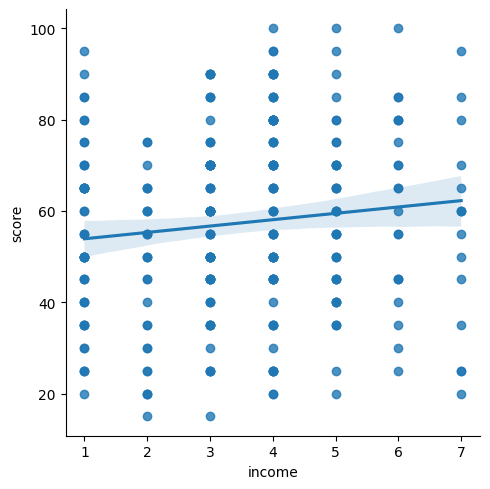

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.lmplot(x='income', y='score', data=df)

plt.show()


잔차도 그려보자.

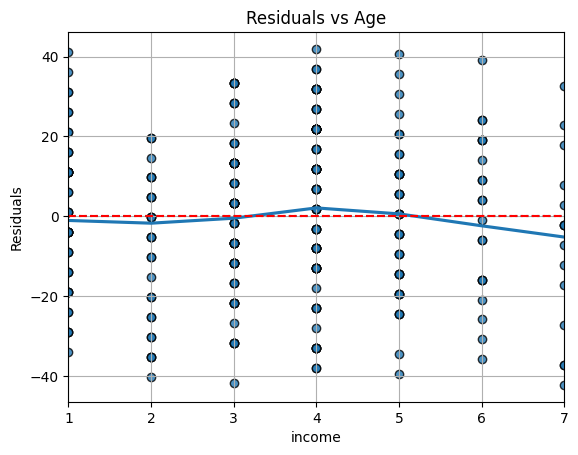

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.residplot(x='income', y='score', data=df, lowess=True,
                  scatter_kws=dict(alpha=0.8, edgecolor='black'))

plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Age")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

# **연습문제**


*   교육수준과 경제이해력 점수간 관계에 대한 회귀선과 잔차플롯을 그려보세요.
https://padlet.com/nathalieskim/7-wi0dx54pmg7mz4rf

